<a href="https://colab.research.google.com/github/leocraig18/Data-Science-Analysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
from calendar import month_name

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.shape

(4324, 9)

In [9]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
df_data.tail()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [12]:
df_data.count()

Unnamed: 0        4324
Unnamed: 0.1      4324
Organisation      4324
Location          4324
Date              4324
Detail            4324
Rocket_Status     4324
Price              964
Mission_Status    4324
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

After preliminary data exploration we can see that the first two columns contain junk data and can thus be removed.
We should also check for duplicates and NaN values and consider removing them.

In [13]:
print(f"Any NaN values? {df_data.isna().values.any()}")
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? False


In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [15]:
# The unnamed columns contain junk data and thus can be dropped from the df:
df_data = df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [16]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

I am also going to convert the data types of the Price and Date columns.

In [17]:
# Convert Date column data from object to datetime type.
df_data.Date = pd.to_datetime(df_data.Date, utc=True)


In [18]:
# Convert Price data to float from object.
  # First need to remove commas from str:
df_data.Price = df_data.Price.str.replace(',', '')
df_data.Price = df_data.Price.astype(float)


In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


## Descriptive Statistics

In [20]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

In [21]:
launch_organisations = df_data.groupby('Organisation').size().reset_index(name='launches')
 
launch_organisations.sort_values(by='launches', inplace=True)
top_launch_organisations = launch_organisations[-20:]

In [22]:
h_bar = px.bar(x=top_launch_organisations.launches,
               y=top_launch_organisations.Organisation,
               orientation='h',
               color=top_launch_organisations.launches,
               color_continuous_scale=px.colors.sequential.haline,
               title='Top 20 Organisations by launches.')
h_bar.update_layout(xaxis_title='Number of Launches', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

# Number of Active versus Retired Rockets

In [23]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [24]:
status_bar = px.bar(x=df_data["Rocket_Status"].value_counts().index,
               y=df_data["Rocket_Status"].value_counts(),
               title='Number of Active versus Retired Rockets')
 
status_bar.update_layout(xaxis_title='Rocket Status', 
                    yaxis_title='Total Rockets')
status_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [25]:
mission_success = df_data.Mission_Status.value_counts()
mission_success

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [26]:
pie = px.pie(names=mission_success.index, values=mission_success.values,
                    title='How many missions were successful?',
                   )

pie.show()

# How Expensive are the Launches?

In [27]:
df_clean = df_data.dropna(subset=['Price'])
df_clean.shape
df_clean.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


The dataframe used for this analysis has lots of missing Price values. In order to visualise the data using a histogram and Kernel density estimation I have dropped these NaN values.

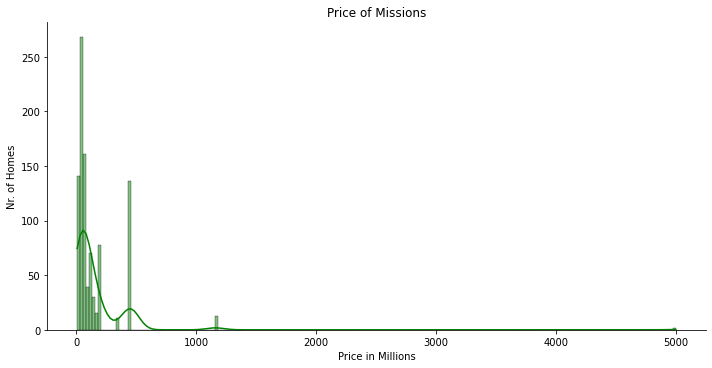

In [28]:
sns.displot(x=df_clean.Price, 
            aspect=2,
            color='green',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Nr. of Homes')

plt.show()


This chart is distorted due to the huge outliers on the upper end of the distribution. In order to get a better visualisation of the data I will drop this value from the dataframe.

In [29]:
df_clean_2 = df_data.dropna(subset=['Price'])
df_clean_2 = df_data[df_data['Price'] < 4500]

In [30]:
print(df_clean.shape)
df_clean_2.shape

(964, 7)


(962, 7)

Based on the shape of the data. We can see that by removing the outliers we only lose two rows. We can now revisualise our data.

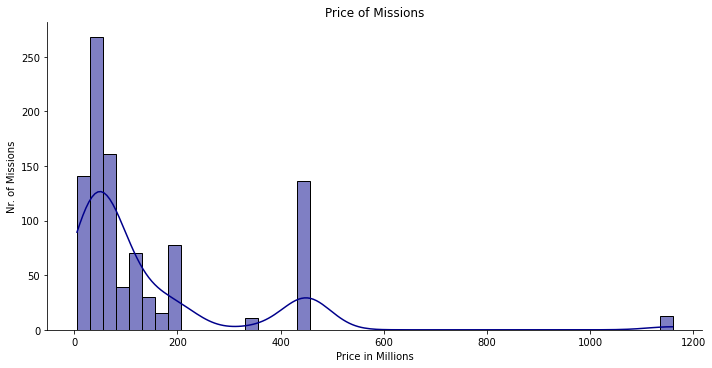

In [31]:
sns.displot(x=df_clean_2.Price,
            aspect=2,
            color='darkblue',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Nr. of Missions')

plt.show()

By removing prices over 1000 again we can visualise our data one more time.

(949, 7)


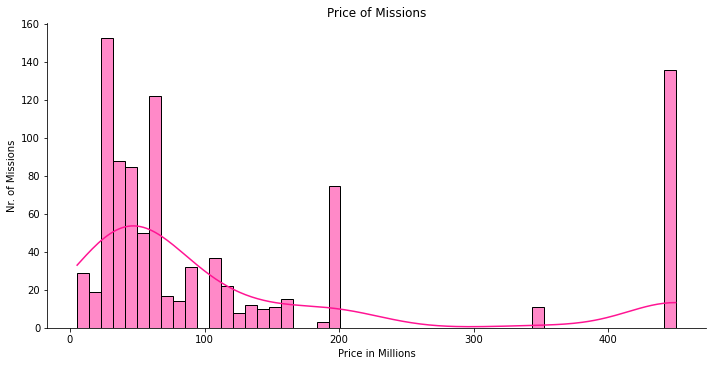

In [32]:
df_clean_3 = df_data.dropna(subset=['Price'])
df_clean_3 = df_data[df_data['Price'] < 1000]
print(df_clean_3.shape)
sns.displot(x=df_clean_3.Price,
            bins=50,
            aspect=2,
            color='deeppink',
            kde=True)

plt.title('Price of Missions')
plt.xlabel('Price in Millions')
plt.ylabel('Nr. of Missions')

plt.show()

We can see that the majority of missions costed under 200 million USD. However, there are a more than 120 missions costing over 400 million. Furthermore, there have been 15 missions costing more than 1.1 Billion USD and two of these costed 5 Billion USD. The average cost of the launches we have price data for is $153.79 Million

# Number of Launches by Country
In order to use a Choropleth Map I need to convert the Country names to ISO codes. First the names must be converted to the compatible country names as described below.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA
* South Korea should be Korea, Republic of
* North Korea should be Korea, Democratic People's Republic of.

After converting the neccessary country names I can add a ISO column and convert to Alpha3 codes.

In [33]:
df_data['Country'] = df_data['Location'].str.extract(',\s*([^,]+)$')
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country'],
      dtype='object')


In addition, the launches from LP Odyssey, Kiritimati Launch Area, Pacific Ocean, do not have ISO codes as the launches took place in the oceon and were colaborated by multiple countries including Norway, Russia, Ukraine, and the United States based on my research. Read more [here:](https://en.wikipedia.org/wiki/Sea_Launch#:~:text=Sea%20Launch%20was%20established%20in,was%20launched%20in%20March%201999.)

In [34]:
df_data['Country'] = df_data['Country'].replace('New Mexico', 'USA')
df_data['Country'] = df_data['Country'].replace('Russia', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Yellow Sea', 'China')
df_data['Country'] = df_data['Country'].replace('Shahrud Missile Test Site', 'Iran')
df_data['Country'] = df_data['Country'].replace('Pacific Missile Range Facility', 'USA')
df_data['Country'] = df_data['Country'].replace('Barents Sea', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Gran Canaria', 'USA')
df_data['Country'] = df_data['Country'].replace('South Korea', "Korea, Republic of")
df_data['Country'] = df_data['Country'].replace("North Korea", "Korea, Democratic People's Republic of")

In [35]:
def convert_to_iso3166(name):
    try:
        return countries.get(name).alpha3
    except:
        return None


In [36]:
df_data["ISO"] = df_data['Country'].apply(lambda x: convert_to_iso3166(x))

# Using a Choropleth Map to Show the Number of Failures by Country


In [37]:
failed_missions = df_data[df_data.Mission_Status == "Failure"]

In [38]:
df_countries = failed_missions.groupby(['Country', 'ISO'], 
                               as_index=False).agg({'Mission_Status': pd.Series.count})
df_countries.rename(columns={'Mission_Status': 'Failed_Launches'}, inplace=True)
df_countries.sort_values('Failed_Launches', ascending=False)

,Country,ISO,Failed_Launches
12,USA,USA,129
7,Kazakhstan,KAZ,72
11,Russian Federation,RUS,63
2,China,CHN,19
3,France,FRA,13
6,Japan,JPN,10
4,India,IND,8
0,Australia,AUS,3
8,"Korea, Democratic People's Republic of",PRK,3
1,Brazil,BRA,2


In [39]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='Failed_Launches', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Sunburst Chart of the countries, organisations, and mission status. 

In [40]:
df_data["Mission_Status_duplicate"] = df_data.Mission_Status.astype(str)
country_org_success = df_data.groupby(by=['Country', 
                                       'Organisation', 'Mission_Status'], as_index=False).agg({'Mission_Status_duplicate': pd.Series.count})
 
country_org_success = country_org_success.sort_values('Mission_Status_duplicate', ascending=False)

In [41]:
burst = px.sunburst(country_org_success, 
                    path=['Country', 'Organisation', 'Mission_Status'], 
                    values=country_org_success.Mission_Status_duplicate.values,
                    title='Where do launches take place and how successful are they?',
                   )
 
burst.show()

In [42]:
burst = px.sunburst(country_org_success, 
                    path=['Organisation', 'Country', 'Mission_Status'], 
                    values='Mission_Status_duplicate',
                    title='Where do launches take place and how successful are they?',
                   )
 
burst.show()

# Total Amount of Money Spent by Organisation on Space Missions

In [43]:
total_spent = df_data.groupby(by=['Organisation'], as_index=False).sum()
total_spent = total_spent.sort_values('Price', ascending=True)
top_spenders = total_spent[-20:]

In [44]:
h_bar = px.bar(x=top_spenders.Price,
               y=top_spenders.Organisation,
               orientation='h',
               color=top_spenders.Price,
               color_continuous_scale='Viridis',
               title='Top 20 Organisations by total spending.')
h_bar.update_layout(xaxis_title='Total Spent in Millions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

These figures would suggest that NASA have spent significantly more that RVSN USSR. However, this dataset only provides us with two non-zero Price data entries for RVSN USSR launches. In fact we are missing price data for most launches. This is an example of a case where the analysis is limited by the quality of the data. In order to get around this we can look at average spending for the data we do have.

# Amount of Money Spent by Organisation per Launch

In [45]:
organisation_counts = df_data.dropna().groupby('Organisation').size().reset_index(name='counts')
merged_df = pd.merge(organisation_counts, total_spent, on='Organisation')

In [46]:
merged_df['average_price'] = merged_df['Price'] / merged_df['counts']
merged_df = merged_df.sort_values('average_price', ascending=True)
top_20_average = merged_df[-20:]
top_20_average

,Organisation,counts,Price,average_price
10,Kosmotras,22,638.00,29.00
8,ISRO,67,"2,177.00",32.49
11,Lockheed,8,280.00,35.00
4,ESA,1,37.00,37.00
2,CASC,158,"6,340.26",40.13
5,Eurockot,13,543.40,41.80
23,VKS RF,33,"1,548.90",46.94
15,Northrop,83,"3,930.00",47.35
18,Roscosmos,23,"1,187.50",51.63
20,SpaceX,99,"5,444.00",54.99


In [47]:
h_bar = px.bar(x=top_20_average.average_price,
               y=top_20_average.Organisation,
               orientation='h',
               color=top_20_average.average_price,
               color_continuous_scale='Viridis',
               title='Organisations Average Price Per Launch.')
h_bar.update_layout(xaxis_title='Average in Millions USD', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

The price data avaliable to us suggests that RVSN USSR spending was significantly higher than per launch at 5 Billion USD per launch. However the sample size is to small to be reliable.

# Chart the Number of Launches per Year

In [53]:
df_year = df_data.groupby(df_data.Date.dt.year, as_index=False).size()
df_year = df_year.sort_values('Date', ascending=True)
df_year['moving_avg'] = df_year['size'].rolling(window=5).mean()
df_year

,Date,size,moving_avg
0,1957,3,NaN
1,1958,28,NaN
2,1959,20,NaN
3,1960,39,NaN
4,1961,52,28.40
...,...,...,...
59,2016,90,55.80
60,2017,92,66.60
61,2018,117,80.80
62,2019,109,92.00


In [54]:
year_bar = px.bar(x=df_year.Date,
               y=df_year["size"],
               title='Number of Launches Per Year')
year_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
year_bar.add_trace(go.Scatter(x=df_year['Date'], y=df_year['moving_avg'], mode='lines', name='Moving Average'))
year_bar.show()

# Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [55]:
df_data['year'] = df_data['Date'].dt.year
df_data['month'] = df_data['Date'].dt.month
df_month = df_data.groupby(['year', 'month'], as_index=False).size()

In [68]:
year_bar = px.bar(x=df_month.year,
               y=df_month["size"],
               title='Total Launches by Month')
year_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
year_bar.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [214]:
year_bar = px.bar(x=df_month.month,
               y=df_month["size"],
               title='Total Launches by Month')
year_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
year_bar.show()

Based on the data avaliable, December is the most popular month for launches, whilst January is the least popular.

# How has the Launch Price varied Over Time? 

In [215]:
df_data["year"] = df_data.Date.dt.year

In [216]:
df_prices = df_data.dropna(subset=['Price'])

In [217]:
df_prices.shape

(964, 12)

In [218]:
avg_price_df = df_prices.groupby('year')['Price'].mean()
avg_price_df

year
1964      63.23
1965      63.23
1966      59.00
1967     196.62
1968     279.20
1969     609.50
1970   1,160.00
1971   1,160.00
1972   1,160.00
1973   1,160.00
1981     450.00
1982     345.20
1983     366.16
1984     380.13
1985     408.08
1986     310.27
1987   1,687.20
1988   1,193.16
1989     380.83
1990     289.15
1991     391.43
1992     319.35
1993     276.73
1994     221.51
1995     325.00
1996     243.20
1997     221.74
1998     152.12
1999     128.51
2000     173.12
2001     290.70
2002     185.59
2003      80.51
2004      92.74
2005      95.79
2006     138.61
2007     125.70
2008     129.75
2009     180.29
2010     148.40
2011     146.60
2012     122.29
2013      90.55
2014     102.55
2015      91.55
2016      79.46
2017      69.49
2018      64.75
2019      59.61
2020      56.65
Name: Price, dtype: float64

In [219]:
moving_average = avg_price_df.rolling(window=5).mean()

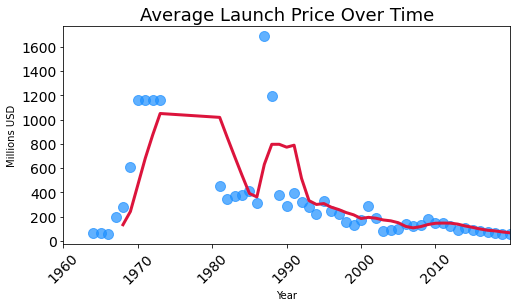

In [220]:
plt.figure(figsize=(8,4))
plt.title("Average Launch Price Over Time", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Millions USD')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1960, 2020, step=10), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1960, 2020)

ax.scatter(x=avg_price_df.index, 
           y=avg_price_df.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(avg_price_df.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

Once again, our lack of access to Price per launch launch data limits our ability to provide useful visualisations on this topic. As you can see the figure is missing all price data for launchs in the mid-late 1970's.

We can see that with time our access to price data has increased. With this, the distribution around the moving average has reduced massively.

## Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [221]:
df_grouped = df_data.groupby(['Organisation', 'year']).size().reset_index(name='counts')
df_grouped

,Organisation,year,counts
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [222]:
reshaped_df  = df_grouped.pivot(index='year', columns='Organisation', values='counts')
reshaped_df

Organisation,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
year,,,,,,,,,,,,,,,,,,,,,
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
1958,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.00,12.00,NaN,NaN,NaN,NaN,NaN
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.00,4.00,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.00,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,NaN,NaN,11.00,NaN,4.00,NaN,22.00,NaN,NaN,...,9.00,NaN,12.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN
2017,NaN,NaN,NaN,11.00,NaN,1.00,NaN,16.00,1.00,NaN,...,18.00,NaN,8.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN
2018,NaN,NaN,NaN,11.00,NaN,2.00,NaN,37.00,NaN,NaN,...,21.00,NaN,8.00,NaN,NaN,NaN,5.00,NaN,NaN,NaN


In [252]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.isna().values.any()

False

In [253]:
# Get the total launches for each organization
total_launches = reshaped_df.sum()

# Get the top 10 organizations
top_10_orgs = total_launches.nlargest(10).index

# Get the columns that are not in the top 10 organizations
cols_to_drop = reshaped_df.columns.difference(top_10_orgs)

# Drop the other columns
top_10_df = reshaped_df.drop(cols_to_drop, axis=1)

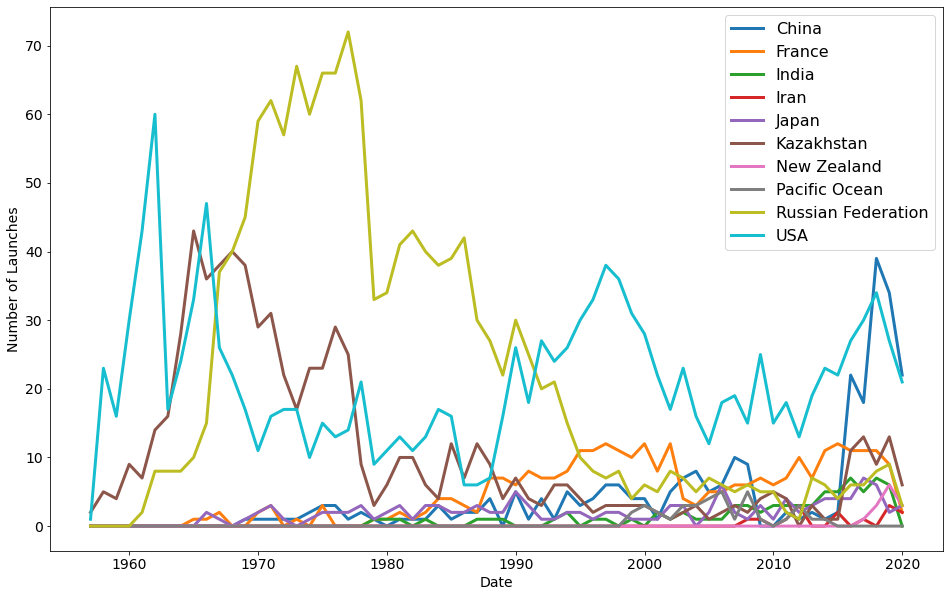

In [254]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

for column in top_10_df.columns:
    plt.plot(top_10_df.index, top_10_df[column], linewidth=3, label=top_10_df[column].name)
plt.legend(fontsize=16) 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [255]:
df_grouped = df_data.groupby(['Country', 'year']).size().reset_index(name='counts')
reshaped_df  = df_grouped.pivot(index='year', columns='Country', values='counts')
cols_to_drop = reshaped_df.columns.difference(["USA", "Russian Federation", "Kazakhstan"])
# Drop the other columns
df = reshaped_df.drop(cols_to_drop, axis=1)
df.fillna(0, inplace=True)
df.isna().values.any()
df = df.assign(USSR=df['Russian Federation'] + df['Kazakhstan'])
df = df.drop(['Russian Federation', 'Kazakhstan'], axis=1)
df_launches = df

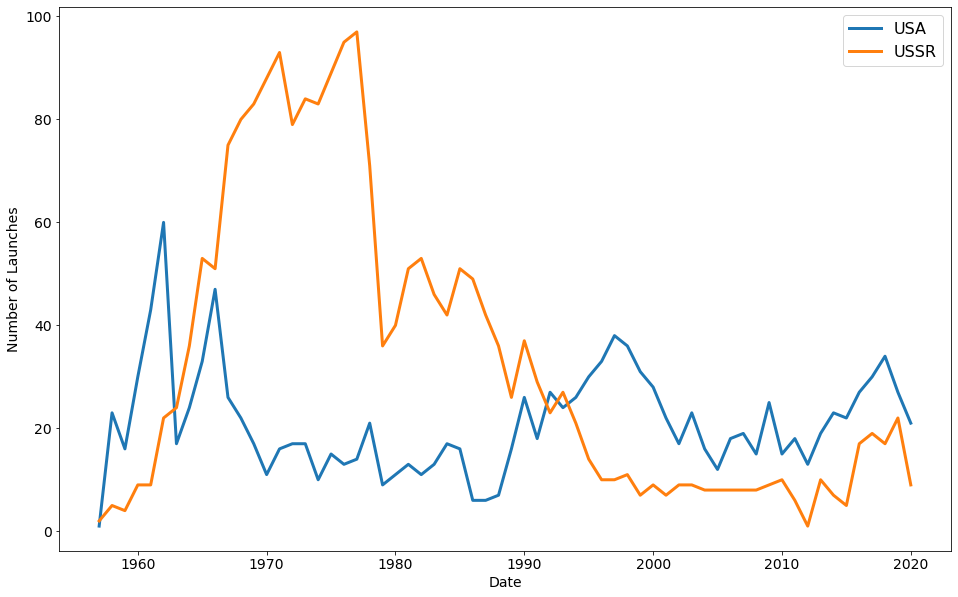

In [256]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
for column in df.columns:
    plt.plot(df.index, df[column], linewidth=3, label=df[column].name)
plt.legend(fontsize=16) 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [257]:
df_cold = df_data.groupby(['Country', 'Organisation', 'year']).size().reset_index(name='counts')
df_cold = df_cold[df_cold['Country'].isin(['USA','Russian Federation', 'Kazakhstan'])]
df_cold = df_cold.drop(df_cold[df_cold['year'] > 1991].index)

In [258]:
burst = px.sunburst(df_cold, 
                    path=['Organisation', 'Country', 'year'], 
                    values='counts',
                    title='Total launches: USSR vs USA',
                   )
 
burst.show()
burst = px.sunburst(df_cold, 
                    path=['Country','Organisation', 'year'], 
                    values='counts',
                   )
 
burst.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [259]:
df_cumulative = df.cumsum()

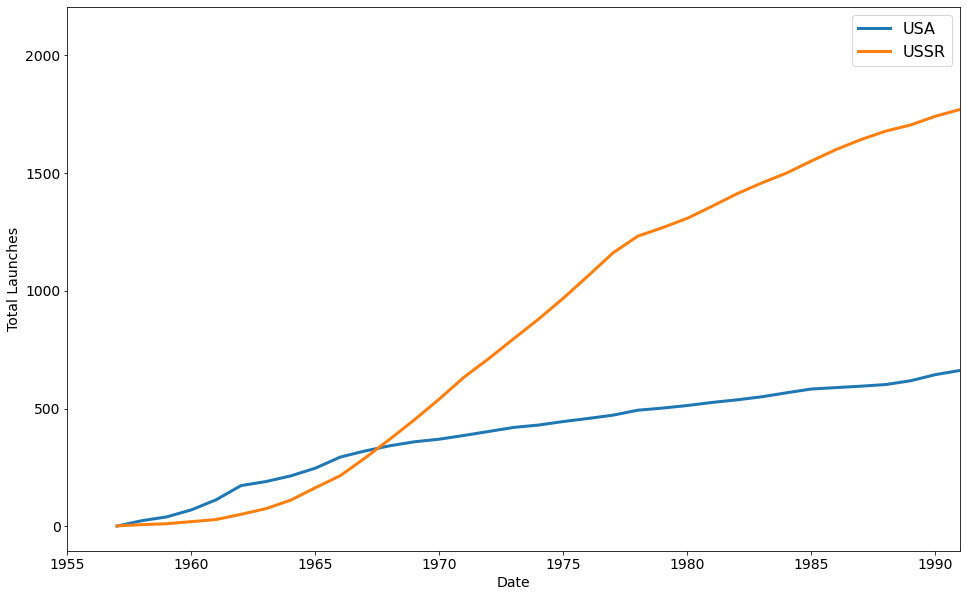

In [260]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Launches', fontsize=14)
plt.xlim(1955, 1991)
for column in df.columns:
    plt.plot(df_cumulative.index, df_cumulative[column], linewidth=3, label=df_cumulative[column].name)
plt.legend(fontsize=16) 

## Total Number of Mission Failures Year on Year.

In [261]:
df = df_data[df_data['Mission_Status'].isin(['Failure','Prelauch Failure'])]
df = df.groupby(['Country','year'])['Mission_Status'].count().reset_index()
df.rename(columns={'Mission_Status':'Failures'}, inplace=True)
df = df[df['Country'].isin(['USA','Russian Federation', 'Kazakhstan'])]
df = df.drop(df[df['year'] > 1991].index)
df = df.pivot(index='year', columns=['Country'], values='Failures')
df = df.assign(USSR=df['Russian Federation'] + df['Kazakhstan'])
df = df.drop(['Russian Federation', 'Kazakhstan'], axis=1)
df.fillna(0, inplace=True)
df_cumulative = df.cumsum()

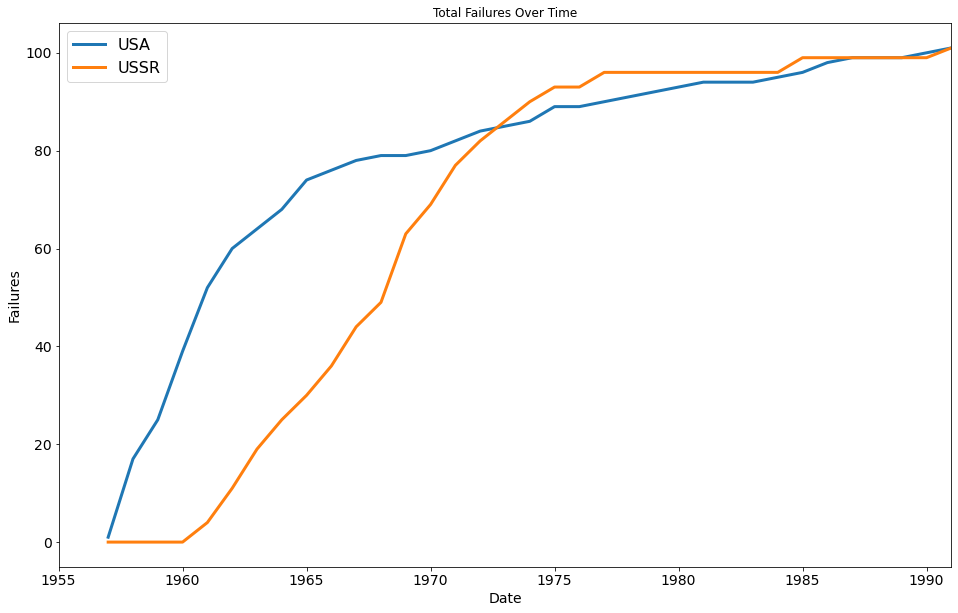

In [262]:
plt.figure(figsize=(16,10))
plt.title('Total Failures Over Time')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Failures', fontsize=14)
plt.xlim(1955, 1991)
for column in df.columns:
    plt.plot(df_cumulative.index, df_cumulative[column], linewidth=3, label=df_cumulative[column].name)
plt.legend(fontsize=16) 

The chart above shows the cumulative failures until the end of the cold war. We see that the USA suffered failures earlier than the USSR, however during the heat of the space race the USSR's failures grew exponentially as their cumulative curve is convexed, before turning concaved as failures plateu towards the end of the 1970's. As we cannot see the total number of launches on this chart it may be more incitefull to plot failures as a percentage of total launches.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

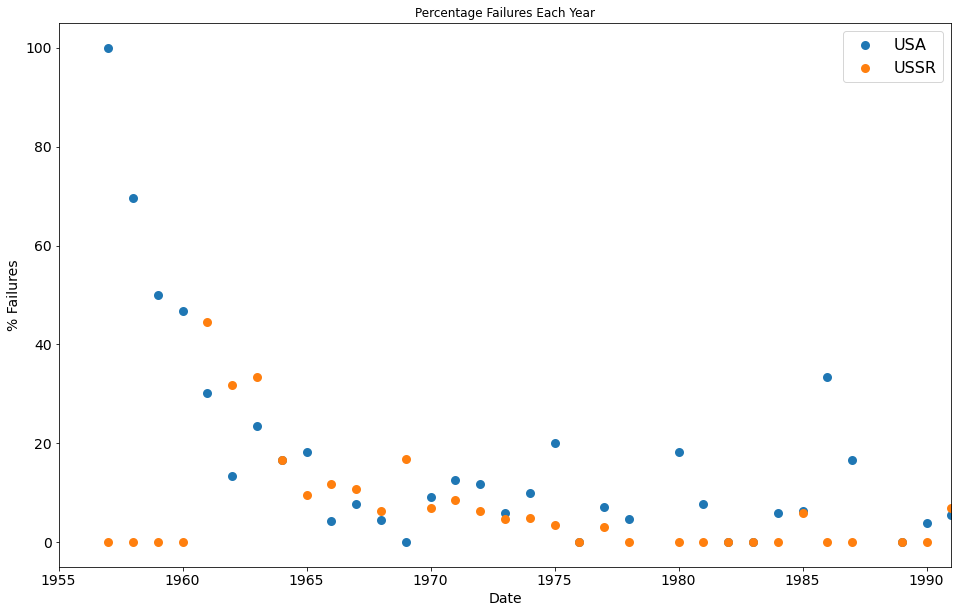

In [263]:
# Create a new dataframe with the same shape as the launches_df
percent_failures_df = df.copy()

# Divide the values in the failures_df by the corresponding values in the launches_df
percent_failures_df[['USSR', 'USA']] = df[['USSR', 'USA']] / df_launches[['USSR', 'USA']]
percent_failures_df[['USSR', 'USA']] *= 100

plt.figure(figsize=(16,10))
plt.title('Percentage Failures Each Year')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Failures', fontsize=14)
plt.xlim(1955, 1991)
for column in df.columns:
    plt.scatter(percent_failures_df.index, percent_failures_df[column], linewidth=3, label=percent_failures_df[column].name)
plt.legend(fontsize=16) 

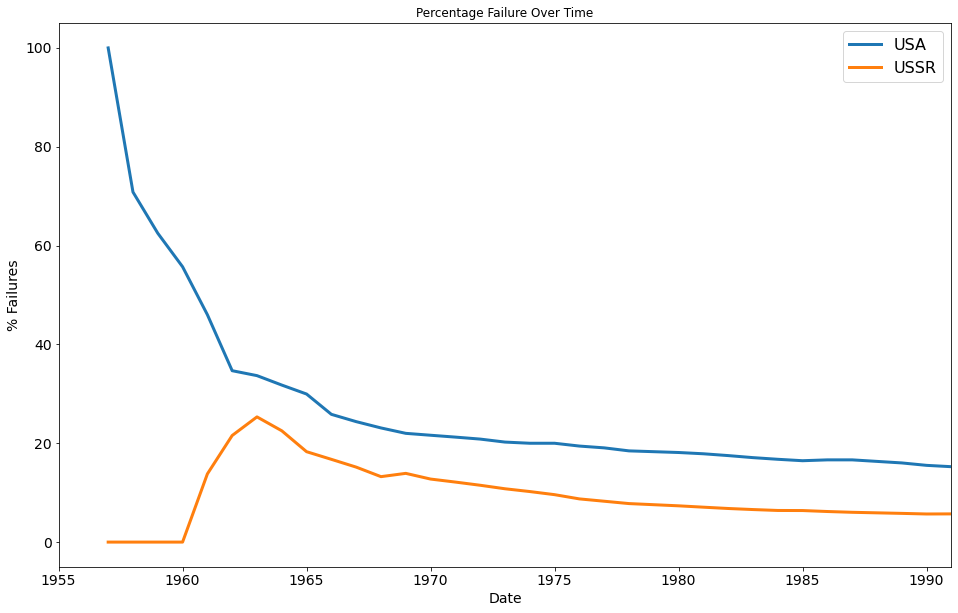

In [271]:
percent_failures_df = df.copy()

# Divide the values in the failures_df by the corresponding values in the launches_df
percent_failures_df[['USSR', 'USA']] = df[['USSR', 'USA']].cumsum() / df_launches[['USSR', 'USA']].cumsum()
percent_failures_df[['USSR', 'USA']] *= 100

plt.figure(figsize=(16,10))
plt.title('Percentage Failure Over Time')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Failures', fontsize=14)
plt.xlim(1955, 1991)
for column in df.columns:
    plt.plot(percent_failures_df.index, percent_failures_df[column], linewidth=3, label=percent_failures_df[column].name)
plt.legend(fontsize=16) 

From this we can see that the USA in fact had a worse success rate for the duration of the cold war, and the USSR's higher number of total failures is as a result of their larger cumulative launches over the time period.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [290]:
launches_per_year = df_data.groupby(['Organisation', 'year'], as_index=False).size()
grouped = launches_per_year.groupby(['year'])
max_index = grouped['size'].idxmax()
max_df = launches_per_year.loc[max_index]
max_df

,Organisation,year,size
497,RVSN USSR,1957,2
624,US Navy,1958,12
599,US Air Force,1959,10
600,US Air Force,1960,21
601,US Air Force,1961,23
...,...,...,...
117,CASC,2016,22
578,SpaceX,2017,18
119,CASC,2018,37
120,CASC,2019,27


In [293]:
launches_bar = px.bar(x=max_df.year,
               y=max_df["size"],
               orientation='v',
               color=max_df.Organisation,
               labels=max_df.Organisation,
               title='Organisation with most launches.')
launches_bar.update_layout(xaxis_title='Year', 
                    yaxis_title='Launches',
                    coloraxis_showscale=False)
launches_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 